In [22]:
import pandas as pd
import cPickle as cp
import matplotlib.pyplot as plt
import numpy as np
import read_spec
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

%matplotlib inline

In [28]:
data_sensor_2 = cp.load(open('data_20170715_sensor_2.p'))
# Correct for time zone difference
data_sensor_2.index -= pd.to_timedelta('13h')
# Need to remove data with Temperature < 20 or > 22
data_sensor_2[(data_sensor_2['Temperature (C)'] <18) |
              (data_sensor_2['Temperature (C)'] > 30)] = np.nan
data_sensor_2[data_sensor_2['Pressure (Pa)'] < 96000] = np.nan

data_sensor_2[data_sensor_2['CO2 M Intensity (V)'] < 0.8] = np.nan

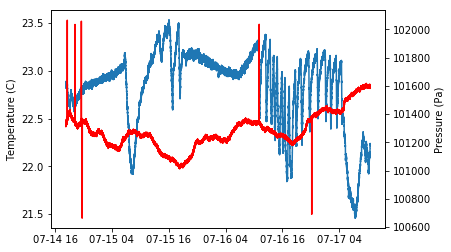

In [35]:
plt.plot(data_sensor_2['Temperature (C)'])
plt.ylabel('Temperature (C)')
ax2 = plt.gca().twinx()
ax2.plot(data_sensor_2['Pressure (Pa)'], 'r')
ax2.set_ylabel('Pressure (Pa)')
plt.xlabel('Time')
# plt.gcf().savefig('T_P_plot_0707.png', dpi=300)
plt.show()

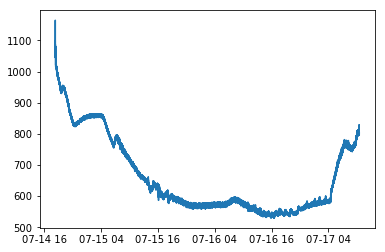

In [32]:
plt.plot(data_sensor_2['CO2 (ppmv)'])

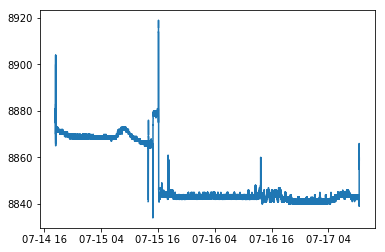

In [33]:
plt.plot(data_sensor_2['CO2 Peak (#)'])

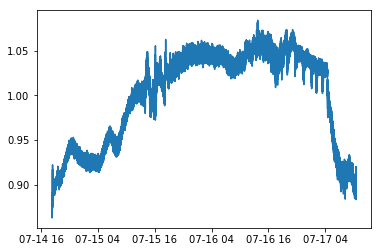

In [70]:
plt.plot(data_sensor_2['H2O (ppmv)']/data_sensor_2['CO2 (ppmv)']/np.mean(data_sensor_2['r_CO2']))

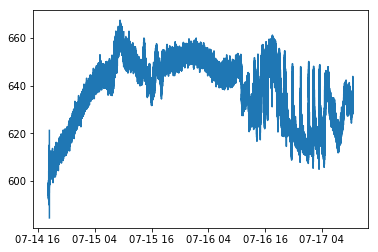

In [41]:
plt.plot(data_sensor_2['CO  (ppmv)'])

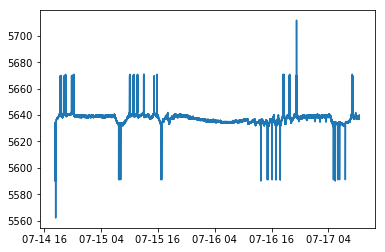

In [42]:
plt.plot(data_sensor_2['CO Peak (#)'])

In [43]:
spec_sensor_2 = cp.load(open('spec_0715_sensor_2.p'))

C:\Users\dpan\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


In [47]:
%matplotlib qt5
plt.plot(spec_sensor_2['spec'][:,2000])

In [50]:
spec_t = np.transpose(spec_sensor_2['spec'])
r_H2O_2 = []
r_CO2_2 = []
for spec in spec_t:
    # plt.plot(spec)
    r_H2O_2.append(read_spec.cal_ratio(spec, 7685, 2513))
    r_CO2_2.append(read_spec.cal_ratio(spec, 9205, 4435))

ratio_data_sensor_2 = pd.DataFrame({'TS': spec_sensor_2['TS'], 'r_H2O_2': r_H2O_2,
                                    'r_CO2_2': r_CO2_2})
ratio_data_sensor_2.set_index('TS', inplace=True)

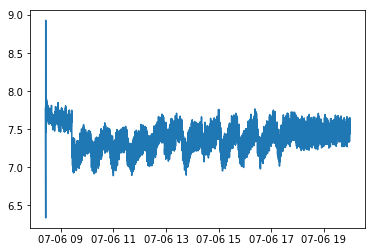

In [52]:
%matplotlib inline
plt.plot(ratio_data_sensor_2['r_H2O_2'])